In [103]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [40]:
data = pd.read_csv('01_Data_Processed.csv')

data.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,2019-01-11 15:08:05.200,0.01,0.98,-0.07,-1.89,2.44,0.94,B,bench,heavy,30
1,2019-01-11 15:08:05.400,-0.00,0.97,-0.08,-1.68,-0.89,2.17,B,bench,heavy,30
2,2019-01-11 15:08:05.600,0.00,0.97,-0.06,2.56,-0.26,-1.41,B,bench,heavy,30
3,2019-01-11 15:08:05.800,-0.02,0.96,-0.07,8.06,-4.52,-2.07,B,bench,heavy,30
4,2019-01-11 15:08:06.000,-0.03,0.96,-0.12,2.44,-1.55,-3.61,B,bench,heavy,30


In [41]:
#Checking the types of data
data.dtypes

epoch (ms)          object
Accelerometer_x    float64
Accelerometer_y    float64
Accelerometer_z    float64
Gyroscope_x        float64
Gyroscope_y        float64
Gyroscope_z        float64
Participants        object
Label               object
Category            object
Set                  int64
dtype: object

In [42]:
#Dropping the missing or null values
data.isnull().sum()

epoch (ms)         0
Accelerometer_x    0
Accelerometer_y    0
Accelerometer_z    0
Gyroscope_x        0
Gyroscope_y        0
Gyroscope_z        0
Participants       0
Label              0
Category           0
Set                0
dtype: int64

In [43]:
#Dropping the duplicate rows
duplicate_rows = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 11)


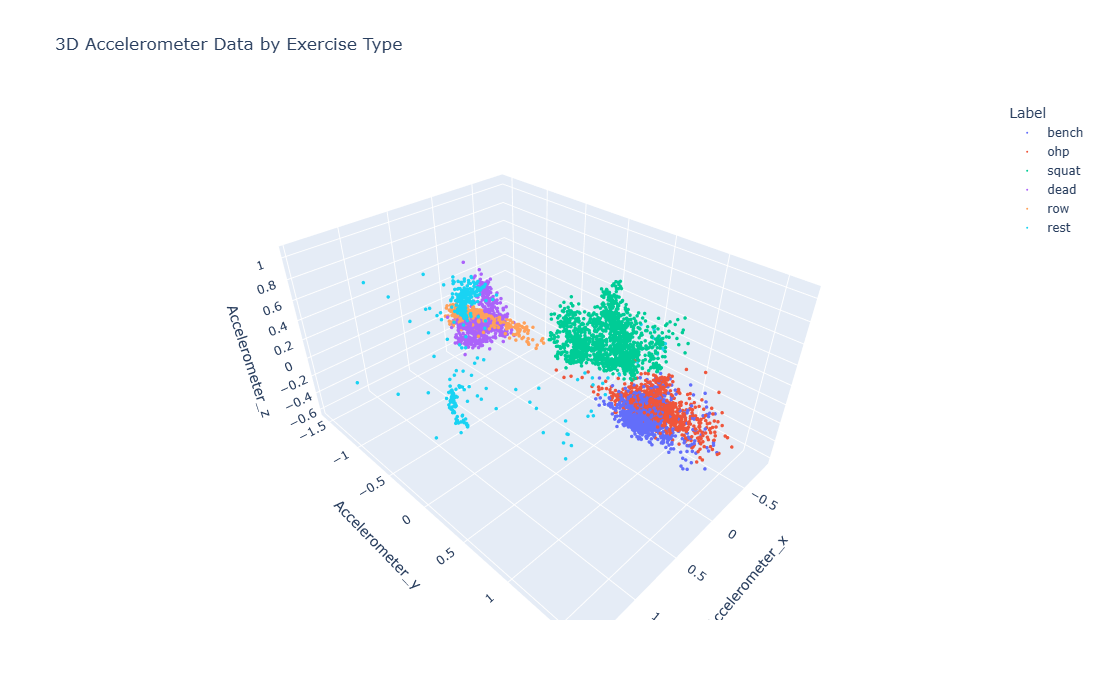

In [44]:
#data visualization
fig = px.scatter_3d(data, 
                    x='Accelerometer_x', 
                    y='Accelerometer_y', 
                    z='Accelerometer_z', 
                    color='Label',
                    title='3D Accelerometer Data by Exercise Type')
fig.update_traces(marker=dict(size=2))

fig.update_layout(
    width=1000,    # Set the width of the figure
    height=700,    # Set the height of the figure
)

fig.show()

In [45]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9009 entries, 0 to 9008
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   epoch (ms)       9009 non-null   object 
 1   Accelerometer_x  9009 non-null   float64
 2   Accelerometer_y  9009 non-null   float64
 3   Accelerometer_z  9009 non-null   float64
 4   Gyroscope_x      9009 non-null   float64
 5   Gyroscope_y      9009 non-null   float64
 6   Gyroscope_z      9009 non-null   float64
 7   Participants     9009 non-null   object 
 8   Label            9009 non-null   object 
 9   Category         9009 non-null   object 
 10  Set              9009 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 774.3+ KB


,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Set
count,9009.00,9009.00,9009.00,9009.00,9009.00,9009.00,9009.00
mean,0.04,0.07,0.10,0.79,-1.88,0.83,45.89
std,0.27,0.91,0.33,22.25,17.54,23.19,27.18
min,-0.84,-1.55,-0.62,-235.52,-187.95,-338.17,1.00
25%,-0.11,-0.95,-0.13,-9.60,-6.48,-4.57,23.00
50%,0.02,0.58,-0.03,1.18,-1.98,0.54,47.00
75%,0.12,0.87,0.34,10.44,2.78,6.04,70.00
max,1.46,1.64,1.05,171.80,233.18,269.09,93.00


In [46]:
# Initialize the encoder
label_encoder = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Check the encoded columns
data.head()

,epoch (ms),Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,0,0.01,0.98,-0.07,-1.89,2.44,0.94,1,0,0,30
1,1,-0.00,0.97,-0.08,-1.68,-0.89,2.17,1,0,0,30
2,2,0.00,0.97,-0.06,2.56,-0.26,-1.41,1,0,0,30
3,3,-0.02,0.96,-0.07,8.06,-4.52,-2.07,1,0,0,30
4,4,-0.03,0.96,-0.12,2.44,-1.55,-3.61,1,0,0,30


In [47]:
#Dropping irrelevant columns
data = data.drop(['epoch (ms)'], axis=1)
data.head(5)

,Accelerometer_x,Accelerometer_y,Accelerometer_z,Gyroscope_x,Gyroscope_y,Gyroscope_z,Participants,Label,Category,Set
0,0.01,0.98,-0.07,-1.89,2.44,0.94,1,0,0,30
1,-0.00,0.97,-0.08,-1.68,-0.89,2.17,1,0,0,30
2,0.00,0.97,-0.06,2.56,-0.26,-1.41,1,0,0,30
3,-0.02,0.96,-0.07,8.06,-4.52,-2.07,1,0,0,30
4,-0.03,0.96,-0.12,2.44,-1.55,-3.61,1,0,0,30


In [48]:
print("\nData Types:")

print("\nUpdated DataFrame:")
print(data.head())
print(data.dtypes)


Data Types:

Updated DataFrame:
   Accelerometer_x  Accelerometer_y  Accelerometer_z  Gyroscope_x  \
0             0.01             0.98            -0.07        -1.89   
1            -0.00             0.97            -0.08        -1.68   
2             0.00             0.97            -0.06         2.56   
3            -0.02             0.96            -0.07         8.06   
4            -0.03             0.96            -0.12         2.44   

   Gyroscope_y  Gyroscope_z  Participants  Label  Category  Set  
0         2.44         0.94             1      0         0   30  
1        -0.89         2.17             1      0         0   30  
2        -0.26        -1.41             1      0         0   30  
3        -4.52        -2.07             1      0         0   30  
4        -1.55        -3.61             1      0         0   30  
Accelerometer_x    float64
Accelerometer_y    float64
Accelerometer_z    float64
Gyroscope_x        float64
Gyroscope_y        float64
Gyroscope_z        fl

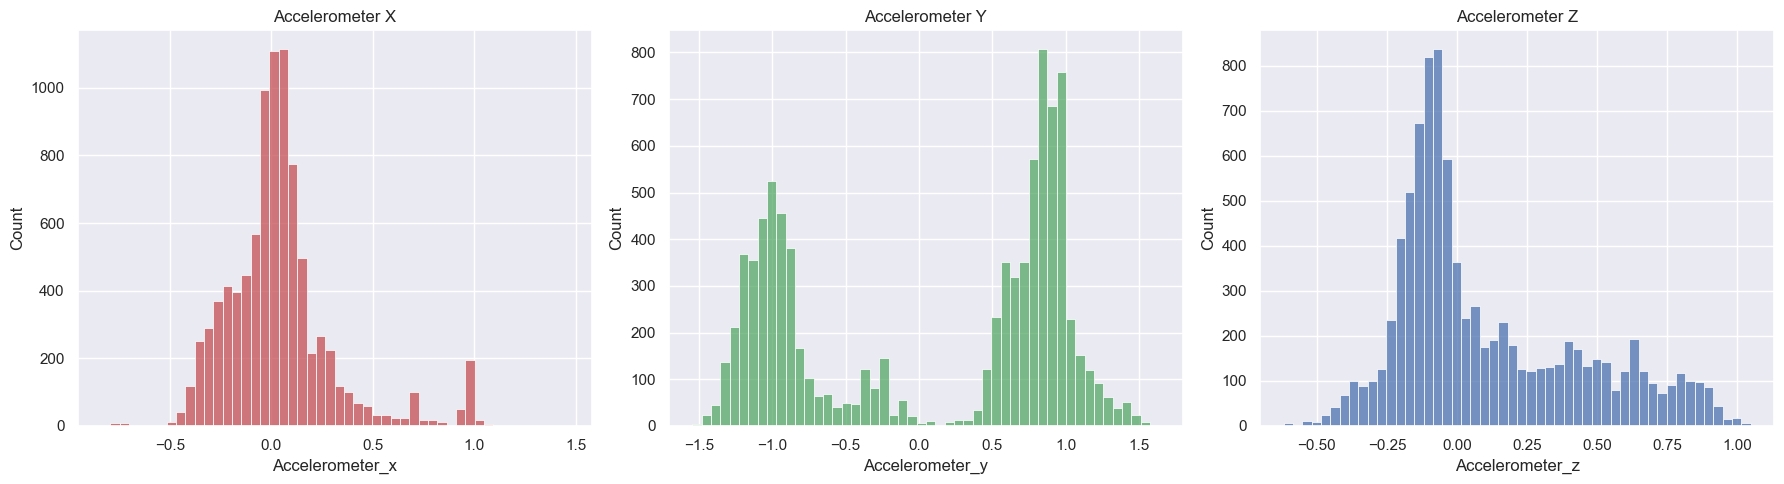

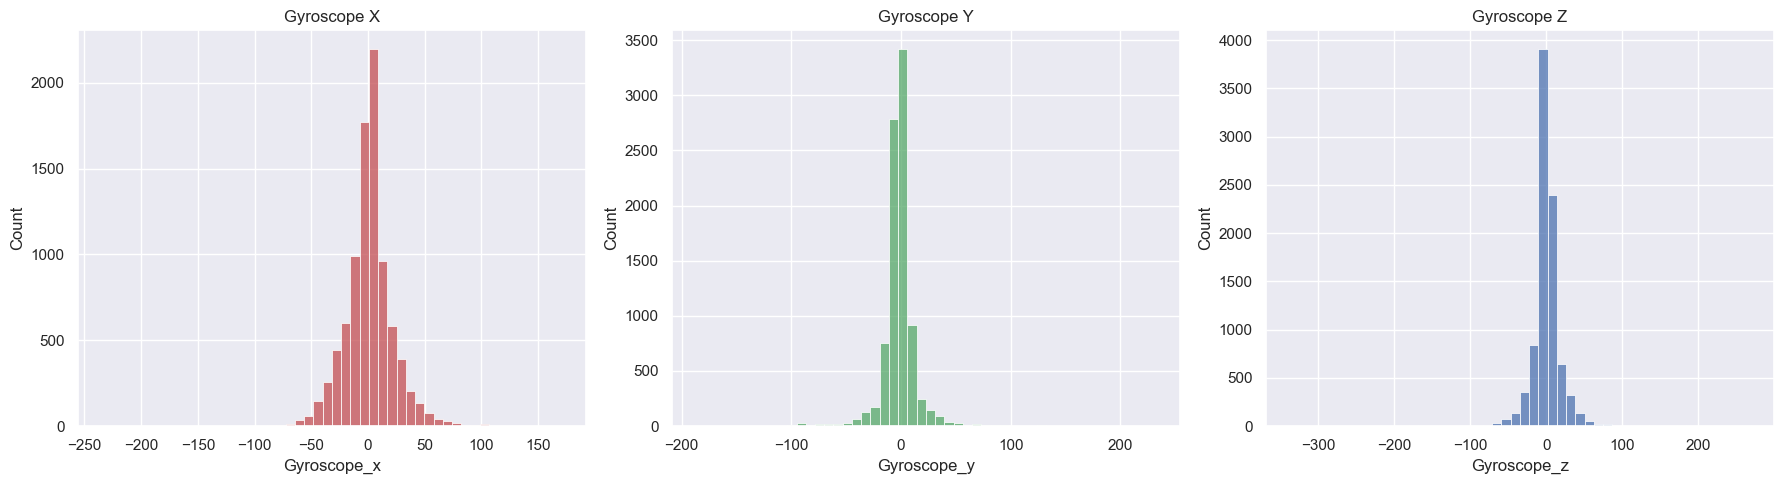

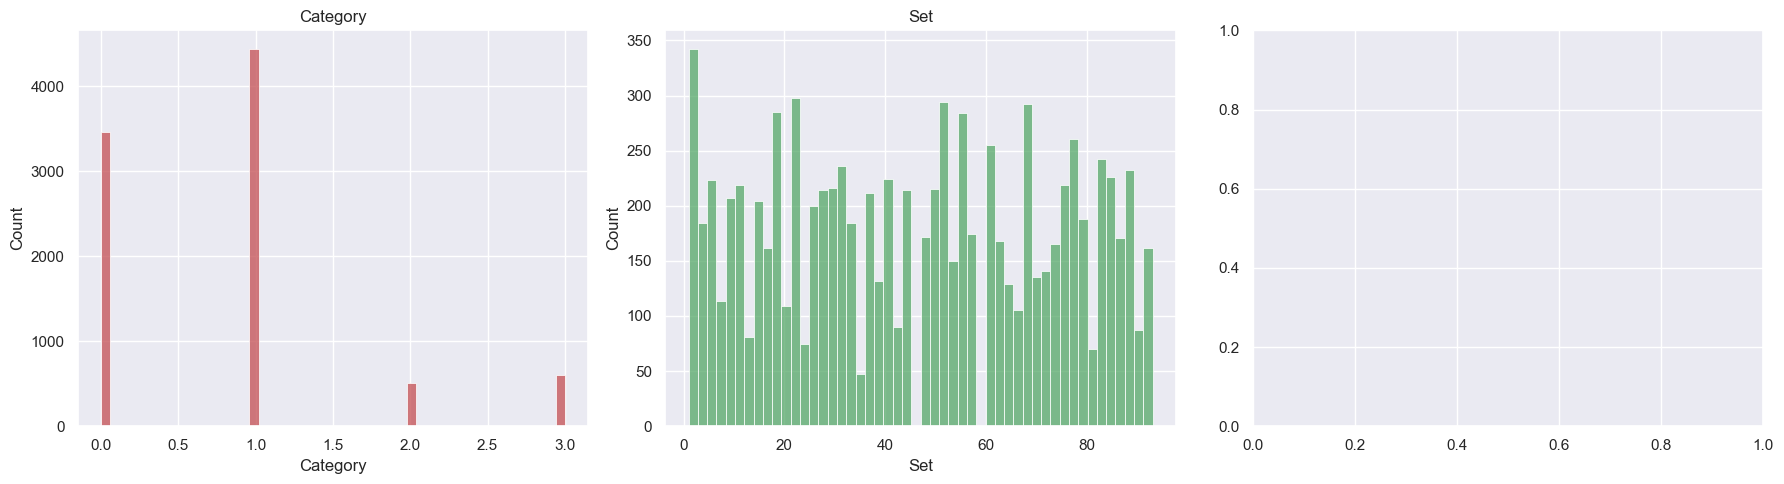

In [49]:
# Plotting accelerometer data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Accelerometer_x'], bins=50, ax=axes[0], color='r').set_title('Accelerometer X')
sns.histplot(data['Accelerometer_y'], bins=50, ax=axes[1], color='g').set_title('Accelerometer Y')
sns.histplot(data['Accelerometer_z'], bins=50, ax=axes[2], color='b').set_title('Accelerometer Z')
plt.tight_layout()
plt.show()
# Plotting gyroscope data
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Gyroscope_x'], bins=50, ax=axes[0], color='r').set_title('Gyroscope X')
sns.histplot(data['Gyroscope_y'], bins=50, ax=axes[1], color='g').set_title('Gyroscope Y')
sns.histplot(data['Gyroscope_z'], bins=50, ax=axes[2], color='b').set_title('Gyroscope Z')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['Category'], bins=50, ax=axes[0], color='r').set_title('Category')
sns.histplot(data['Set'], bins=50, ax=axes[1], color='g').set_title('Set')
plt.tight_layout()
plt.show()

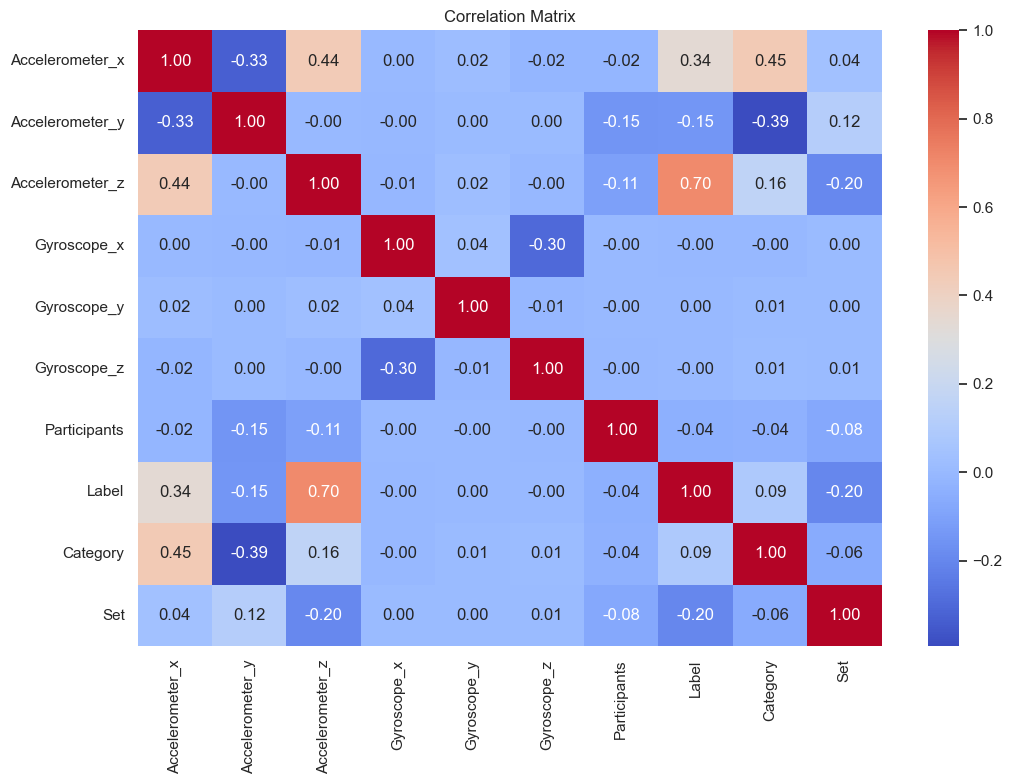

In [50]:
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

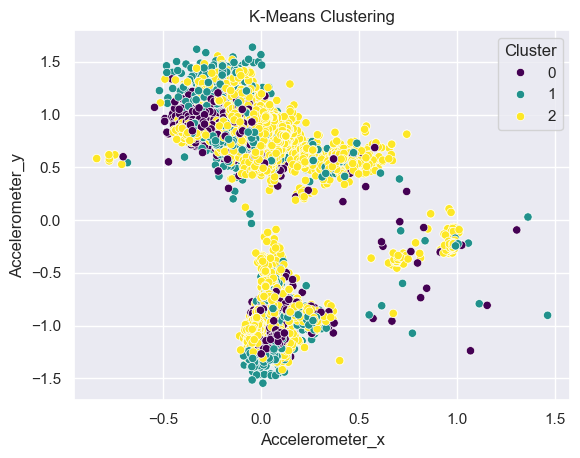

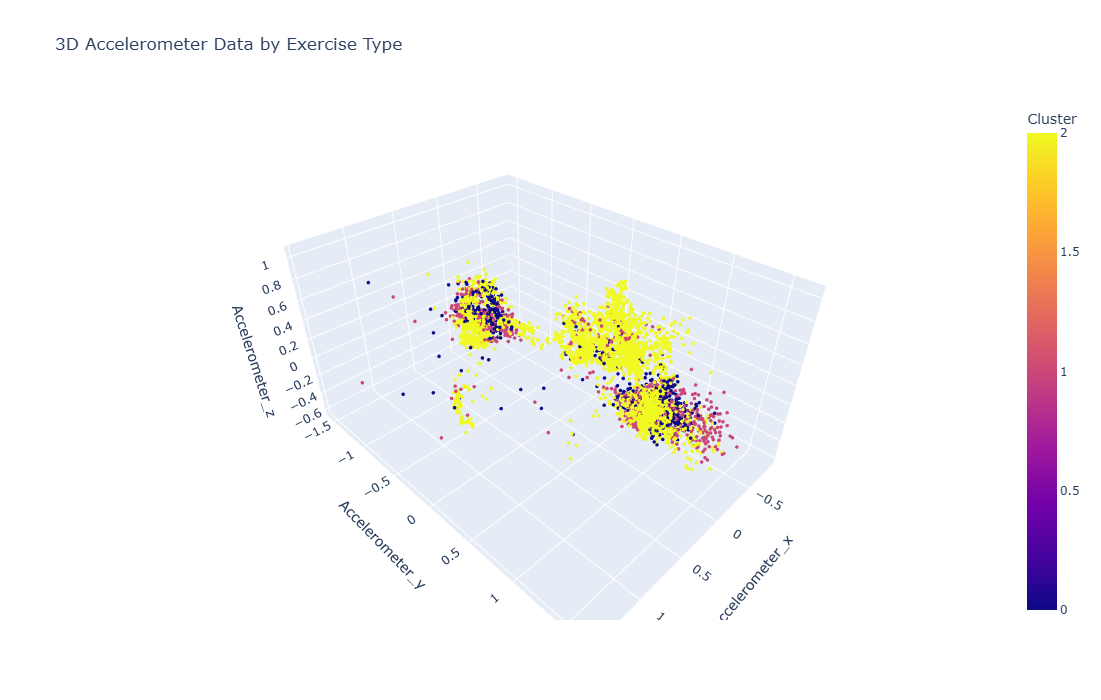

In [51]:
# Select features for clustering (excluding target column)
X = data[['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 
          'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z', 'Category']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can experiment with n_clusters
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (for 2D features)
sns.scatterplot(data=data, x='Accelerometer_x', y='Accelerometer_y', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.show()

fig = px.scatter_3d(data, 
                    x='Accelerometer_x', 
                    y='Accelerometer_y', 
                    z='Accelerometer_z', 
                    color='Cluster',
                    title='3D Accelerometer Data by Exercise Type')
fig.update_traces(marker=dict(size=2))

fig.update_layout(
    width=1000,    # Set the width of the figure
    height=700,    # Set the height of the figure
)

fig.show()

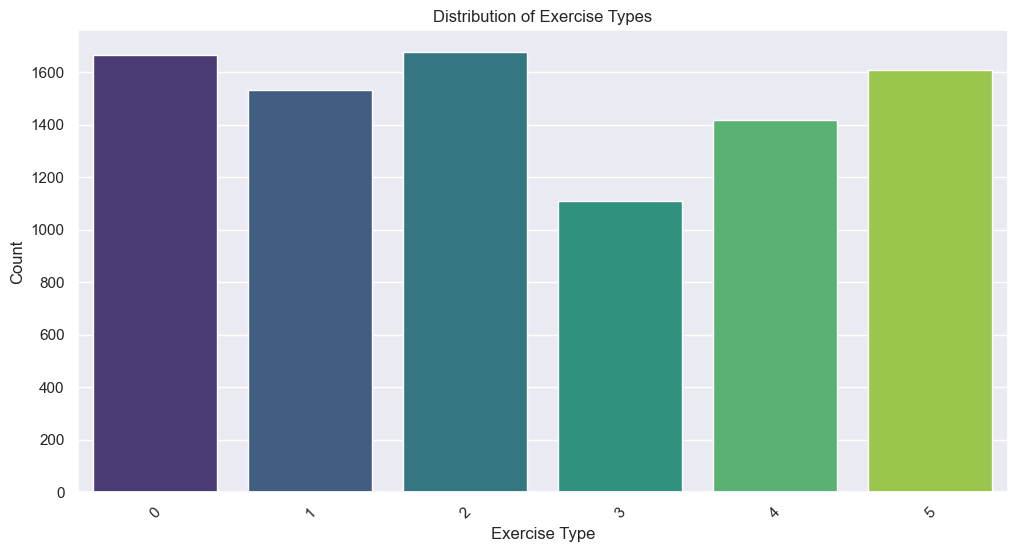

In [52]:
# Count plot for exercise types
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Label', palette='viridis')
plt.title('Distribution of Exercise Types')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Exercise Type')
plt.show()

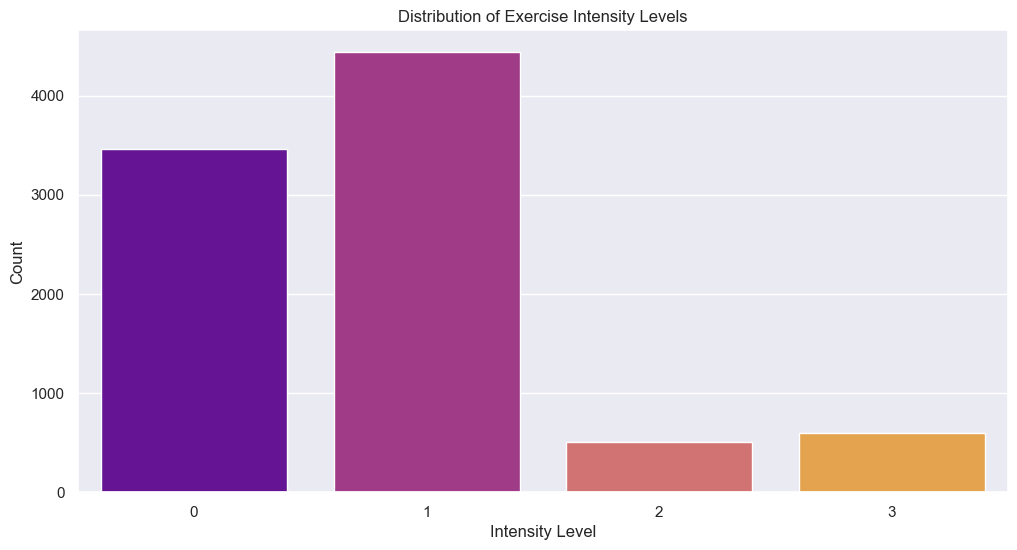

In [53]:
# Count plot for exercise intensity categories
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', palette='plasma')
plt.title('Distribution of Exercise Intensity Levels')
plt.ylabel('Count')
plt.xlabel('Intensity Level')
plt.show()

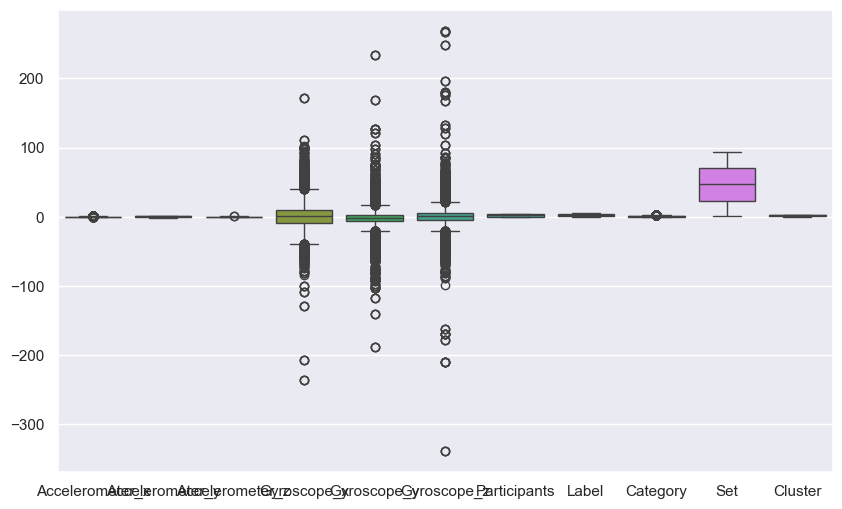

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.show()


In [55]:
#detecting outliers
numeric_data = data.select_dtypes(include=['number'])

# Calculate IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
data_no_outliers = data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]


print(f"Original Data Shape: {data.shape}")
print(f"Data Shape after Removing Outliers: {data_no_outliers.shape}")

Original Data Shape: (9009, 11)
Data Shape after Removing Outliers: (6202, 11)


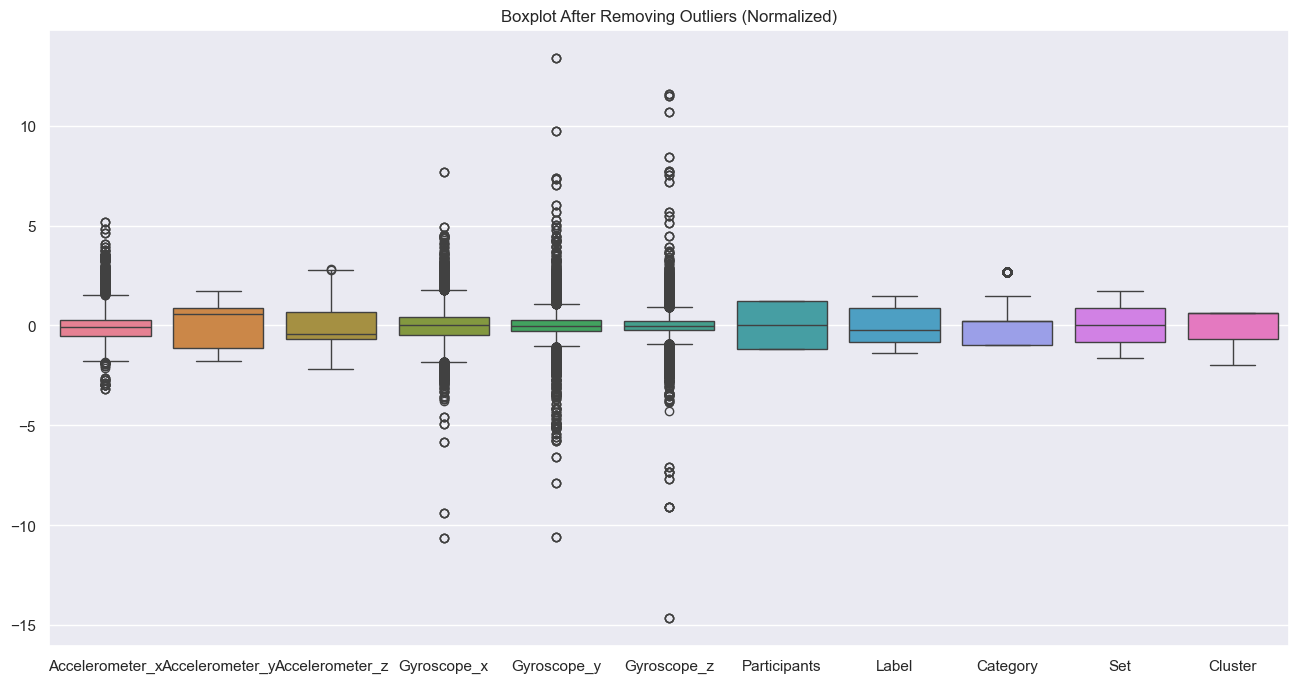

In [56]:
# Normalize the data
data_no_outliers.select_dtypes(include=['number'])

scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_data.columns)
# Plot the normalized boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=normalized_df)
plt.title("Boxplot After Removing Outliers (Normalized)")
plt.show()

In [57]:
# Initialize LazyPredict
features = data_no_outliers.drop(columns = 'Label')
target = data_no_outliers['Label'] 

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target , test_size=0.2, random_state=42, stratify=target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print results
print(models)


      Accelerometer_x  Accelerometer_y  Accelerometer_z  Gyroscope_x  \
6455            -0.02             1.08            -0.12         1.40   
3379            -0.14             0.71            -0.39        26.35   
4572             0.09            -0.86            -0.09       -34.49   
5454             0.22             0.57             0.78       -13.93   
2427            -0.12             0.94            -0.16       -11.99   
...               ...              ...              ...          ...   
7527             0.05             0.98            -0.10         2.33   
6840            -0.01             0.70            -0.20         0.67   
3345            -0.07             0.92            -0.34         5.90   
6045             0.12             0.87             0.64        -7.78   
1212             0.01             0.97            -0.07        17.10   

      Gyroscope_y  Gyroscope_z  Participants  Category  Set  Cluster  
6455        -0.77         0.74             3         1   44     

 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:11<00:00,  2.29it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 4961, number of used features: 10
[LightGBM] [Info] Start training from score -1.475856
[LightGBM] [Info] Start training from score -1.637235
[LightGBM] [Info] Start training from score -1.994650
[LightGBM] [Info] Start training from score -4.871776
[LightGBM] [Info] Start training from score -1.655008
[LightGBM] [Info] Start training from score -1.418453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:13<00:00,  2.24it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00               1.00    None      1.00   
LGBMClassifier                     1.00               1.00    None      1.00   
DecisionTreeClassifier             0.99               0.99    None      0.99   
RandomForestClassifier             0.99               0.99    None      0.99   
BaggingClassifier                  0.99               0.99    None      0.99   
ExtraTreeClassifier                0.97               0.97    None      0.97   
LabelPropagation                   0.97               0.96    None      0.97   
LabelSpreading                     0.97               0.96    None      0.97   
SVC                                0.95               0.95    None      0.95   
KNeighborsClassifier               0.94 

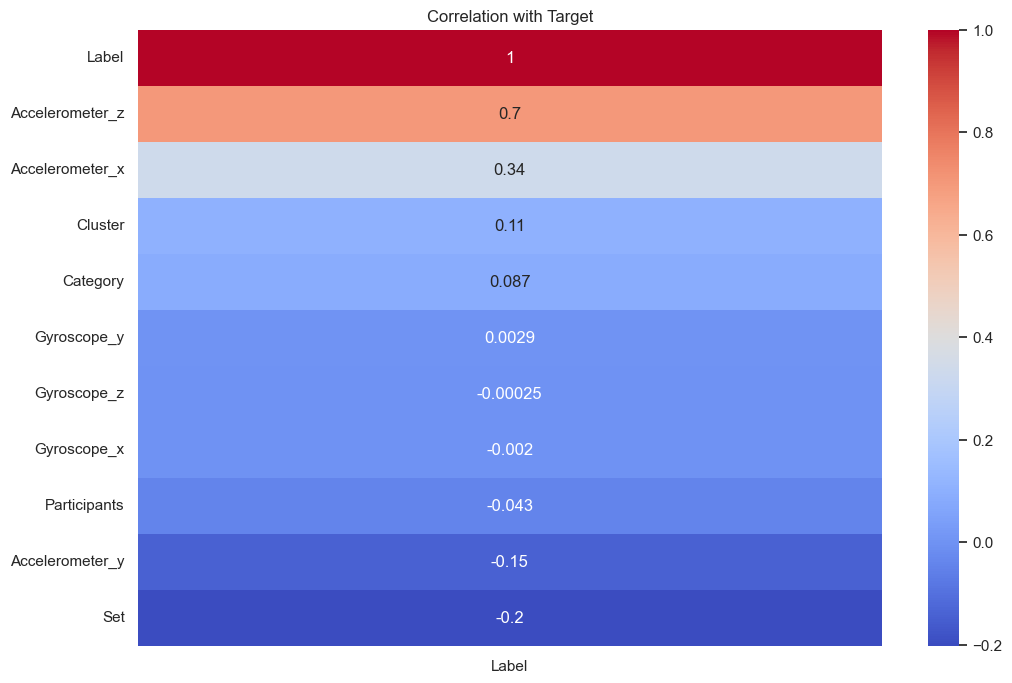

           Feature  Importance
8              Set        3061
1  Accelerometer_y        2490
2  Accelerometer_z        2361
0  Accelerometer_x        1771
6     Participants        1428
7         Category         914
5      Gyroscope_z         581
4      Gyroscope_y         442
3      Gyroscope_x         309
9          Cluster          12


In [58]:
# Calculate correlation
correlation = data.corr()

# Visualize correlation with the target
plt.figure(figsize=(12, 8))
sns.heatmap(correlation[['Label']].sort_values(by='Label', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation with Target")
plt.show()

#calculate feature_importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(10))

In [59]:
features = data_no_outliers[['Accelerometer_z', 
          'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z'  , 'Category' ]]
target = data_no_outliers['Label'] 

# Split data_no_outliers
X_train, X_test, y_train, y_test = train_test_split(features, target , test_size=0.2, random_state=42, stratify=target)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

# Print results
print(models)


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:12<00:00,  1.83it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 4961, number of used features: 5
[LightGBM] [Info] Start training from score -1.475856
[LightGBM] [Info] Start training from score -1.637235
[LightGBM] [Info] Start training from score -1.994650
[LightGBM] [Info] Start training from score -4.871776
[LightGBM] [Info] Start training from score -1.655008
[LightGBM] [Info] Start training from score -1.418453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:14<00:00,  2.10it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.88               0.89    None      0.88   
RandomForestClassifier             0.88               0.88    None      0.88   
XGBClassifier                      0.88               0.88    None      0.88   
LGBMClassifier                     0.87               0.87    None      0.86   
BaggingClassifier                  0.85               0.86    None      0.85   
DecisionTreeClassifier             0.85               0.86    None      0.85   
ExtraTreeClassifier                0.84               0.85    None      0.84   
LabelPropagation                   0.82               0.83    None      0.81   
LabelSpreading                     0.81               0.82    None      0.81   
KNeighborsClassifier               0.75               0.77    None      0.75   
SVC                                0.70 

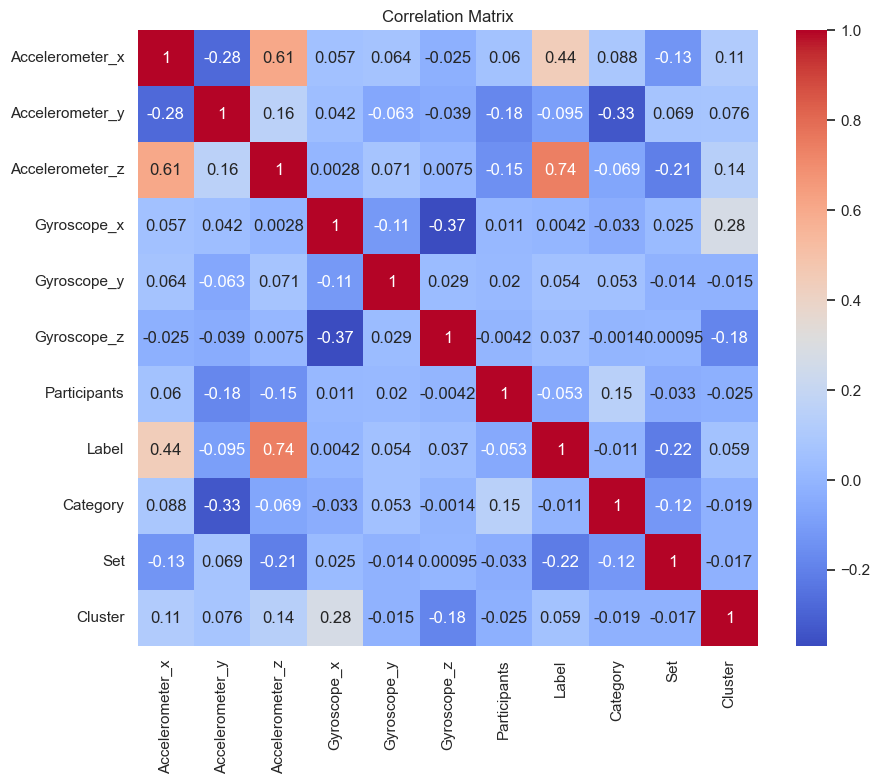

In [60]:
correlation = data_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [100]:
# Group data by Participants
participants = data_no_outliers['Participants'].unique()

train_participants, test_participants = train_test_split(participants, test_size=0.3, random_state=42)

# Separate the data based on these groups
train_data = data_no_outliers[data_no_outliers['Participants'].isin(train_participants)]
test_data = data_no_outliers[data_no_outliers['Participants'].isin(test_participants)]


X_train = train_data[['Accelerometer_y', 'Accelerometer_x','Accelerometer_z',
          'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z'  , 'Category']]
y_train = train_data['Label']

X_test = test_data[['Accelerometer_y', 'Accelerometer_x', 'Accelerometer_z',
          'Gyroscope_x', 'Gyroscope_y', 'Gyroscope_z'  , 'Category']]
y_test = test_data['Label']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print model results
print(models.head(10))

  3%|██▋                                                                                | 1/31 [00:00<00:23,  1.29it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.3494194484760523, 'Balanced Accuracy': 0.5, 'ROC AUC': None, 'F1 Score': 0.18802805022136634, 'Time taken': 0.773413896560669}


  6%|█████▎                                                                             | 2/31 [00:01<00:16,  1.78it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9735123367198839, 'Balanced Accuracy': 0.9674948533445641, 'ROC AUC': None, 'F1 Score': 0.9729374077328677, 'Time taken': 0.40967345237731934}
{'Model': 'BernoulliNB', 'Accuracy': 0.7743105950653121, 'Balanced Accuracy': 0.5773963539913218, 'ROC AUC': None, 'F1 Score': 0.7414517050969021, 'Time taken': 0.040354013442993164}


 23%|██████████████████▋                                                                | 7/31 [00:01<00:03,  6.21it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.81966618287373, 'Balanced Accuracy': 0.6288780817903717, 'ROC AUC': None, 'F1 Score': 0.8099779780128255, 'Time taken': 0.30353760719299316}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9756894049346879, 'Balanced Accuracy': 0.9699415274809936, 'ROC AUC': None, 'F1 Score': 0.975185652559844, 'Time taken': 0.08174943923950195}
{'Model': 'DummyClassifier', 'Accuracy': 0.20645863570391873, 'Balanced Accuracy': 0.16666666666666666, 'ROC AUC': None, 'F1 Score': 0.07066163231009309, 'Time taken': 0.0324864387512207}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.8947750362844702, 'Balanced Accuracy': 0.9186622367101304, 'ROC AUC': None, 'F1 Score': 0.8937134324254197, 'Time taken': 0.04108023643493652}


 29%|████████████████████████                                                           | 9/31 [00:02<00:05,  4.07it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.964078374455733, 'Balanced Accuracy': 0.9585918080327941, 'ROC AUC': None, 'F1 Score': 0.9633325329204442, 'Time taken': 0.7550394535064697}
{'Model': 'GaussianNB', 'Accuracy': 0.8076923076923077, 'Balanced Accuracy': 0.7779006887196025, 'ROC AUC': None, 'F1 Score': 0.8025245796971165, 'Time taken': 0.041567325592041016}


 39%|███████████████████████████████▋                                                  | 12/31 [00:02<00:04,  4.66it/s]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7884615384615384, 'Balanced Accuracy': 0.8538200491346832, 'ROC AUC': None, 'F1 Score': 0.7866209649372192, 'Time taken': 0.4713165760040283}


 42%|██████████████████████████████████▍                                               | 13/31 [00:03<00:06,  2.89it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.8211175616835994, 'Balanced Accuracy': 0.8918703574491591, 'ROC AUC': None, 'F1 Score': 0.8169368190653326, 'Time taken': 0.9864835739135742}


 45%|█████████████████████████████████████                                             | 14/31 [00:05<00:09,  1.80it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.81966618287373, 'Balanced Accuracy': 0.8900512566404476, 'ROC AUC': None, 'F1 Score': 0.8154673754178114, 'Time taken': 1.4243738651275635}


 48%|███████████████████████████████████████▋                                          | 15/31 [00:05<00:07,  2.00it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.8142235123367199, 'Balanced Accuracy': 0.7682492535434697, 'ROC AUC': None, 'F1 Score': 0.8065955561942877, 'Time taken': 0.2905294895172119}
{'Model': 'LinearSVC', 'Accuracy': 0.8189404934687954, 'Balanced Accuracy': 0.7513188262537481, 'ROC AUC': None, 'F1 Score': 0.8103519810972075, 'Time taken': 0.047681331634521484}
{'Model': 'LogisticRegression', 'Accuracy': 0.8574020319303338, 'Balanced Accuracy': 0.8284937631356416, 'ROC AUC': None, 'F1 Score': 0.8542473644692238, 'Time taken': 0.1464540958404541}


 65%|████████████████████████████████████████████████████▉                             | 20/31 [00:05<00:02,  4.87it/s]

{'Model': 'NearestCentroid', 'Accuracy': 0.7536284470246735, 'Balanced Accuracy': 0.7242857534045188, 'ROC AUC': None, 'F1 Score': 0.7464522369666227, 'Time taken': 0.03454160690307617}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.8087808417997098, 'Balanced Accuracy': 0.6268692550123905, 'ROC AUC': None, 'F1 Score': 0.803981200303816, 'Time taken': 0.05536055564880371}
{'Model': 'Perceptron', 'Accuracy': 0.7739477503628447, 'Balanced Accuracy': 0.7034415637665618, 'ROC AUC': None, 'F1 Score': 0.7704213417495945, 'Time taken': 0.04923582077026367}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.8929608127721336, 'Balanced Accuracy': 0.8779448575080853, 'ROC AUC': None, 'F1 Score': 0.8906065434589867, 'Time taken': 0.03362917900085449}


 74%|████████████████████████████████████████████████████████████▊                     | 23/31 [00:07<00:02,  3.02it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9709724238026125, 'Balanced Accuracy': 0.9643395767011178, 'ROC AUC': None, 'F1 Score': 0.9702277800296153, 'Time taken': 1.4925532341003418}
{'Model': 'RidgeClassifier', 'Accuracy': 0.7656023222060958, 'Balanced Accuracy': 0.5615228316806641, 'ROC AUC': None, 'F1 Score': 0.7430764024922751, 'Time taken': 0.031272172927856445}


 84%|████████████████████████████████████████████████████████████████████▊             | 26/31 [00:07<00:01,  3.96it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7656023222060958, 'Balanced Accuracy': 0.5615228316806641, 'ROC AUC': None, 'F1 Score': 0.7430764024922751, 'Time taken': 0.2572205066680908}
{'Model': 'SGDClassifier', 'Accuracy': 0.8341799709724238, 'Balanced Accuracy': 0.7849591578634301, 'ROC AUC': None, 'F1 Score': 0.8296433730616584, 'Time taken': 0.1092226505279541}


 87%|███████████████████████████████████████████████████████████████████████▍          | 27/31 [00:09<00:01,  2.34it/s]

{'Model': 'SVC', 'Accuracy': 0.9310595065312046, 'Balanced Accuracy': 0.917935318021131, 'ROC AUC': None, 'F1 Score': 0.9293348115301769, 'Time taken': 1.1753790378570557}


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [00:10<00:00,  2.13it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.9709724238026125, 'Balanced Accuracy': 0.9694827235329176, 'ROC AUC': None, 'F1 Score': 0.9706355808704149, 'Time taken': 1.563422679901123}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1534
[LightGBM] [Info] Number of data points in the train set: 3446, number of used features: 7
[LightGBM] [Info] Start training from score -1.402089
[LightGBM] [Info] Start training from score -1.488243
[LightGBM] [Info] Start training from score -1.979552
[LightGBM] [Info] Start training from score -5.372381
[LightGBM] [Info] Start training from score -1.432013
[LightGBM] [Info] Start training from score -1.920411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:12<00:00,  2.39it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9702467343976778, 'Balanced Accuracy': 0.9688626568110128, 'ROC AUC': None, 'F1 Score': 0.970024428274263, 'Time taken': 2.2484357357025146}
                        Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                   
DecisionTreeClassifier      0.98               0.97    None      0.98   
XGBClassifier               0.97               0.97    None      0.97   
LGBMClassifier              0.97               0.97    None      0.97   
BaggingClassifier           0.97               0.97    None      0.97   
RandomForestClassifier      0.97               0.96    None      0.97   
ExtraTreesClassifier        0.96               0.96    None      0.96   
ExtraTreeClassifier         0.89               0.92    None      0.89   
SVC                         0.93               0.92    None      0.93   
LabelPropagation            0.82               0.89    None      0.82   
LabelSpreading

In [97]:
# Initialize and train LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1533
[LightGBM] [Info] Number of data points in the train set: 3446, number of used features: 7
[LightGBM] [Info] Start training from score -1.402089
[LightGBM] [Info] Start training from score -1.488243
[LightGBM] [Info] Start training from score -1.979552
[LightGBM] [Info] Start training from score -5.372381
[LightGBM] [Info] Start training from score -1.432013
[LightGBM] [Info] Start training from score -1.920411
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [93]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Test Logistic Regression
y_test_pred_lr = log_reg.predict(X_test_scaled)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"Logistic Regression Test Accuracy: {test_accuracy_lr:.2f}")

y_train_pred_lr = log_reg.predict(X_train_scaled)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
print(f"Logistic Regression Train Accuracy: {train_accuracy_lr:.2f}")

print("Train Classification Report:")
print(classification_report(y_train, y_train_pred_lr))

Logistic Regression Test Accuracy: 0.86
Logistic Regression Train Accuracy: 0.78
Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       848
           1       0.65      0.70      0.67       778
           2       0.81      0.70      0.75       476
           3       1.00      1.00      1.00        16
           4       0.69      0.65      0.67       823
           5       0.99      1.00      1.00       505

    accuracy                           0.78      3446
   macro avg       0.83      0.83      0.83      3446
weighted avg       0.78      0.78      0.78      3446



In [95]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       569
           1       1.00      1.00      1.00       428
           2       0.99      0.79      0.88       368
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00       362
           5       1.00      1.00      1.00       997

    accuracy                           0.97      2756
   macro avg       0.98      0.96      0.97      2756
weighted avg       0.97      0.97      0.97      2756



In [96]:
# Predict on training and test sets
y_train_pred = rf_model.predict(X_train) 
y_test_pred = rf_model.predict(X_test)

# Training performance
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Test performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       848
           1       1.00      1.00      1.00       778
           2       1.00      1.00      1.00       476
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00       823
           5       1.00      1.00      1.00       505

    accuracy                           1.00      3446
   macro avg       1.00      1.00      1.00      3446
weighted avg       1.00      1.00      1.00      3446

Test Accuracy: 0.97
Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       569
           1       1.00      1.00      1.00       428
           2       0.99      0.79      0.88       368
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00       362
           5       1.00     

In [101]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate with the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       569
           1       1.00      1.00      1.00       428
           2       1.00      0.80      0.89       368
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00       362
           5       1.00      1.00      1.00       997

    accuracy                           0.97      2756
   macro avg       0.98      0.97      0.97      2756
weighted avg       0.98      0.97      0.97      2756



In [102]:
# Perform cross-validation
cv_scores = cross_val_score(model, features, target, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 4961, number of used features: 5
[LightGBM] [Info] Start training from score -1.476738
[LightGBM] [Info] Start training from score -1.637235
[LightGBM] [Info] Start training from score -1.994650
[LightGBM] [Info] Start training from score -4.871776
[LightGBM] [Info] Start training from score -1.655008
[LightGBM] [Info] Start training from score -1.417620
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [104]:
#DecisionTreeClassifier  modeling
dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train_scaled, y_train)

y_pred = dt_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Test Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       569
           1       1.00      1.00      1.00       428
           2       1.00      0.82      0.90       368
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00       362
           5       1.00      1.00      1.00       997

    accuracy                           0.98      2756
   macro avg       0.98      0.97      0.97      2756
weighted avg       0.98      0.98      0.98      2756

